# Gradient Descent without Partial Derivatives

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn import metrics


import math

#### Step 1: Make a random data set

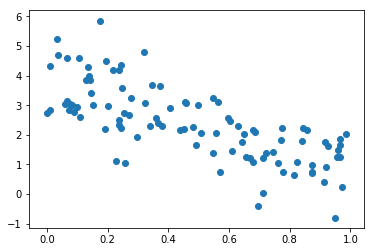

In [21]:
np.random.seed(13)
xrand = np.random.rand(100)
yrand = 4 + -3 * xrand + np.random.randn(100)
plt.scatter(xrand, yrand)


#### Step 2: Lets write our own GDRegression class

In [109]:
class GDRegression:
    """
    Implement a very simple very naive GD regression algorithm.  No calculus required -- just patience (maybe)
    """
    def __init__(self, learn_rate=0.1):
        self.lr = learn_rate
        
    def predict(self,X):
        X_new_b = np.c_[np.ones((X.shape[0],1)),X]
        pp = X_new_b.dot(self.theta_best)
        return pp

    def score(self, X, y):
        return np.sum(np.square(self.predict(X)-y))
    
    def fit(self, X, y, n=1000):
        rows,cols = X.shape
        self.theta_best = np.random.rand(cols+1)
        self.scores = []
        res = self.predict(X)
        lastbase = 0
        for i in range(n):
            base = self.score(X, y)
            self.lr = self.lr / 1.005
            for i in range(len(self.theta_best)):
                savetb = self.theta_best[i]
                self.theta_best[i] = savetb + self.lr
                s1 = self.score(X, y)
                self.theta_best[i] = savetb - self.lr
                s2 = self.score(X, y)
                self.theta_best[i] = savetb
                #print(base, s1, s2)
                if s1 < base and s1 < s2:
                    self.theta_best[i] = savetb + self.lr
                    base = s1
                elif s2 < base and s2 <= s1:
                    self.theta_best[i] = savetb - self.lr
                    base = s2
                lastbase = base
            self.scores.append(base)


lr = GDRegression(0.1)



[0.97167676 0.23153686]


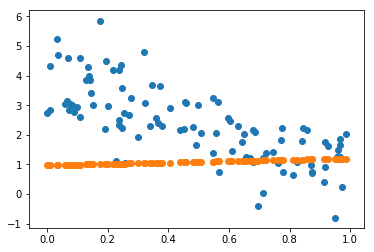

In [110]:
xrand = xrand.reshape(-1,1)
lr.fit(xrand, yrand, 1)
print(lr.theta_best)
plt.scatter(xrand, yrand)
plt.scatter(xrand, lr.predict(xrand))

[1.41265046 0.66943023]


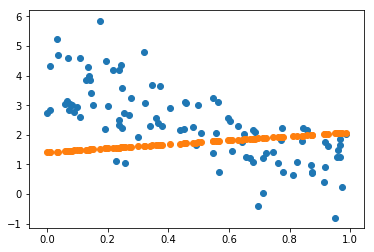

In [111]:
lr.fit(xrand,yrand,10)
print(lr.theta_best)
plt.scatter(xrand, yrand)
plt.scatter(xrand, lr.predict(xrand))

[ 3.02254149 -1.40039029]


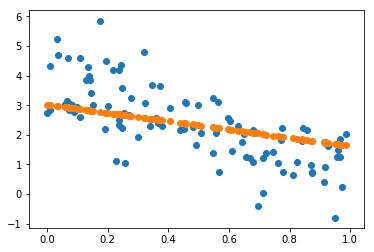

In [112]:
lr.fit(xrand,yrand,40)
print(lr.theta_best)
plt.scatter(xrand, yrand)
plt.scatter(xrand, lr.predict(xrand))

[ 3.77173941 -2.95468628]


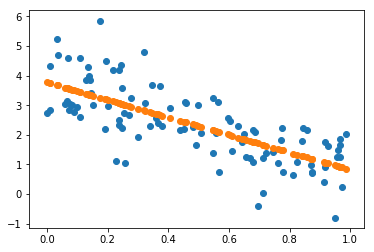

In [16]:
lr.fit(xrand,yrand,50)
print(lr.theta_best)
plt.scatter(xrand, yrand)
plt.scatter(xrand, lr.predict(xrand))

[ 3.83000781 -3.04455123]


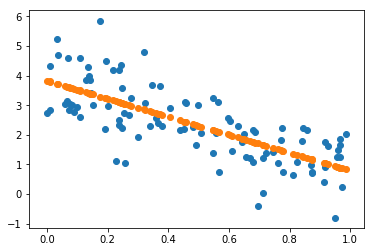

In [113]:
#lr.lr = 0.0001
lr.fit(xrand,yrand,900)
print(lr.theta_best)
plt.scatter(xrand, yrand)
plt.scatter(xrand, lr.predict(xrand))

In [114]:
lr.theta_best

array([ 3.83000781, -3.04455123])

In [115]:
X_b = np.c_[np.ones((100,1)),xrand]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(yrand)
theta_best

array([ 3.82894841, -3.04287621])

In [2]:
try:
    data = pd.read_csv("/home/faculty/millbr02/pub/mushrooms.csv")
except:
    data = pd.read_csv("../../Notebooks/mushrooms.csv")



In [3]:
labelencoder = LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
 
#data.head()

**Separating features and label**

In [4]:
X = data.iloc[:,1:23]  # all rows, all the features and no labels
y = data.iloc[:, 0]  # all rows, label only
#X.head()
#y.head()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [139]:
lr = GDRegression(0.1)

In [140]:
lr.fit(X_train, y_train, 2000)

In [141]:
preds = lr.predict(X_test)

In [142]:
bpreds = [1 if x > 0.5 else 0 for x in preds]

In [143]:
metrics.accuracy_score(y_test, bpreds)

0.9501538461538461

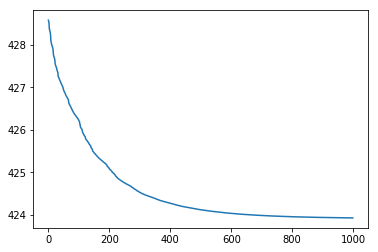

In [144]:
plt.plot(lr.scores[1000:])

(array([ 48., 111., 418., 250.,  31.,  63.,  54., 343., 244.,  63.]),
 array([-0.33991652, -0.17697978, -0.01404305,  0.14889369,  0.31183043,
         0.47476717,  0.63770391,  0.80064065,  0.96357739,  1.12651412,
         1.28945086]),
 <a list of 10 Patch objects>)

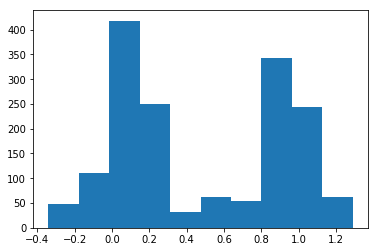

In [145]:
plt.hist(preds)

In [117]:
class GDLogisticRegression:
    """
    Implement a very simple very naive GD regression algorithm.  No calculus required -- just patience (maybe)
    """
    def __init__(self, learn_rate=0.1):
        self.lr = learn_rate
        
    def predict(self,X):
        X_new_b = np.c_[np.ones((X.shape[0],1)),X]
        pp = X_new_b.dot(self.theta_best)
        logist = 1/(1+np.exp(-1*pp))
        return logist

    def score(self, X, y):
        return np.sum(np.square(self.predict(X)-y))
    
    def fit(self, X, y, n=1000):
        rows,cols = X.shape
        self.theta_best = np.random.rand(cols+1)
        self.scores = []
        res = self.predict(X)
        lastbase = 0
        for i in range(n):
            base = self.score(X, y)
            self.lr = self.lr / 1.005
            for i in range(len(self.theta_best)):
                savetb = self.theta_best[i]
                self.theta_best[i] = savetb + self.lr
                s1 = self.score(X, y)
                self.theta_best[i] = savetb - self.lr
                s2 = self.score(X, y)
                self.theta_best[i] = savetb
                #print(base, s1, s2)
                if s1 < base and s1 < s2:
                    self.theta_best[i] = savetb + self.lr
                    base = s1
                elif s2 < base and s2 <= s1:
                    self.theta_best[i] = savetb - self.lr
                    base = s2
                lastbase = base
            self.scores.append(base)





In [146]:
lr = GDLogisticRegression(0.1)

In [147]:
lr.fit(X_train, y_train, 2500)

In [148]:
preds = lr.predict(X_test)

In [149]:
bpreds = [1 if x > 0.5 else 0 for x in preds]

In [150]:
metrics.accuracy_score(y_test, bpreds)

0.9741538461538461

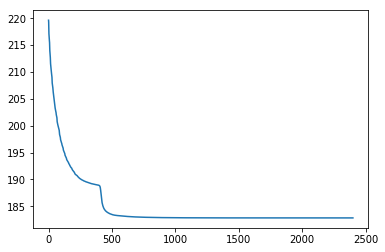

In [151]:

plt.plot(lr.scores[100:])

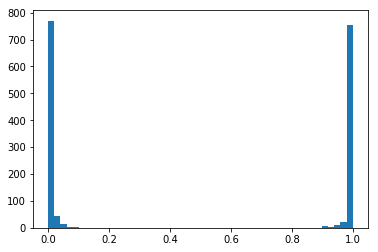

In [155]:
bins = plt.hist(preds,bins=50)